In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='iso-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#clearly last 3 cols has very less non-null values 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
df.sample(3)

,v1,v2
1078,ham,Convey my regards to him
5395,ham,Dunno lei shd b driving lor cos i go sch 1 hr ...
3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v..."


In [7]:
df.rename(columns={'v1':'Target', 'v2':'SMS'}, inplace=True)

In [8]:
df.sample(3)

,Target,SMS
5074,spam,"This is the 2nd attempt to contract U, you hav..."
3539,ham,"I'll get there at 3, unless you guys want me t..."
389,ham,Yup having my lunch buffet now.. U eat already?


In [9]:
#re-labelling target col

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Target'] = encoder.fit_transform(df['Target'])

In [10]:
df.sample(3)

,Target,SMS
997,0,Not a lot has happened here. Feels very quiet....
521,0,Shall i come to get pickle
651,0,I'm gonna say no. Sorry. I would but as normal...


In [11]:
# checking for nulls
df.isnull().sum()

Target    0
SMS       0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
#removing duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int32 
 1   SMS     5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


## EDA

In [15]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

<Axes: ylabel='count'>

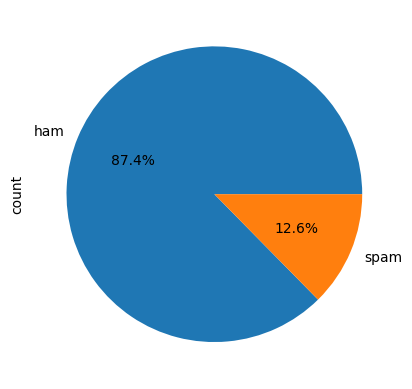

In [16]:
df['Target'].value_counts().plot(kind='pie', labels=['ham', 'spam'], autopct='%0.1f%%')

In [17]:
#data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HARSHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df.loc[:,'num_chars'] = df['SMS'].apply(len)

In [22]:
df

,Target,SMS,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [25]:
#counting number of words
df.loc[:, 'num_words'] = df['SMS'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df

,Target,SMS,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Target     5169 non-null   int32 
 1   SMS        5169 non-null   object
 2   num_chars  5169 non-null   int64 
 3   num_words  5169 non-null   int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 181.7+ KB


In [29]:
#counting number of sentences
df.loc[:, 'num_sentences'] = df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,Target,SMS,num_chars,num_words,num_sentences
2437,1,For ur chance to win å£250 cash every wk TXT: ...,122,26,2
5152,0,Idk. I'm sitting here in a stop and shop parki...,184,43,3
467,0,When are you going to ride your bike?,37,9,1
1187,0,There's no point hangin on to mr not right if ...,68,17,1
2000,0,But i'll b going 2 sch on mon. My sis need 2 t...,55,17,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Target         5169 non-null   int32 
 1   SMS            5169 non-null   object
 2   num_chars      5169 non-null   int64 
 3   num_words      5169 non-null   int64 
 4   num_sentences  5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [31]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham
df[df['Target']==0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['Target']==1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

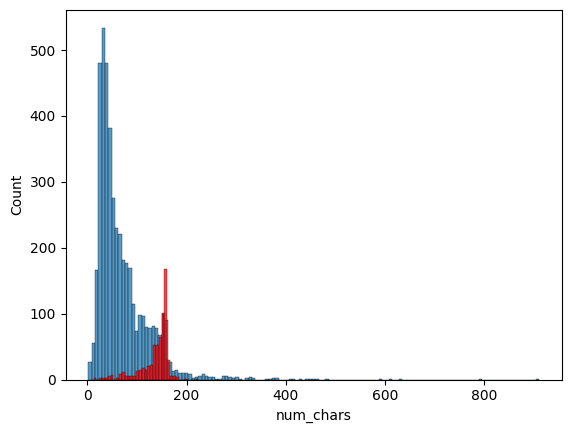

In [34]:
#Visualization
import seaborn as sns
sns.histplot(df[df['Target']==0]['num_chars'])
sns.histplot(df[df['Target']==1]['num_chars'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

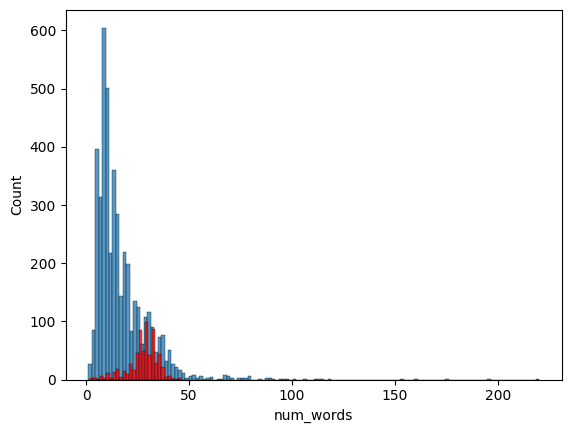

In [35]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'], color='red')

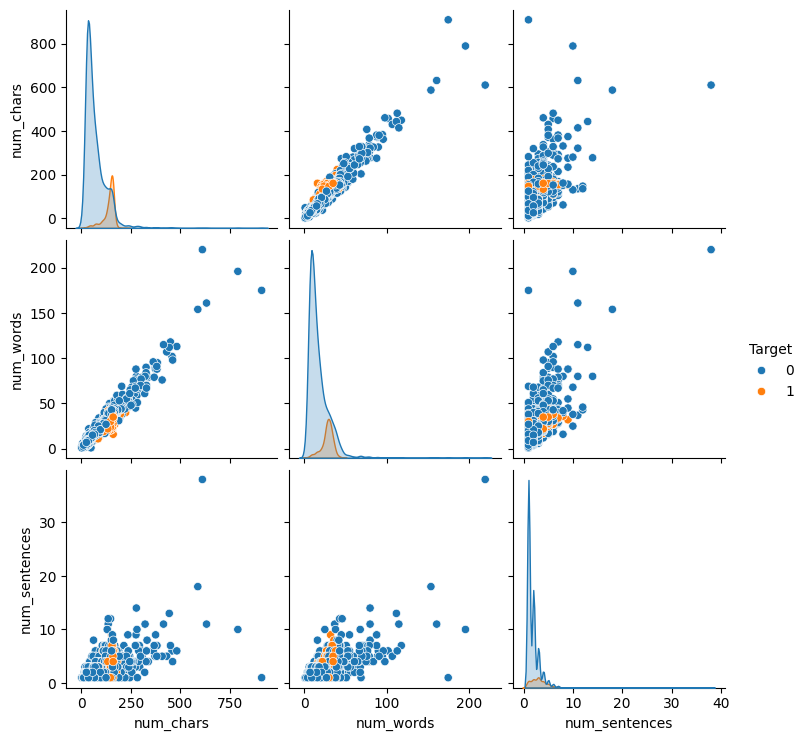

In [36]:
sns.pairplot(df, hue='Target')

<Axes: >

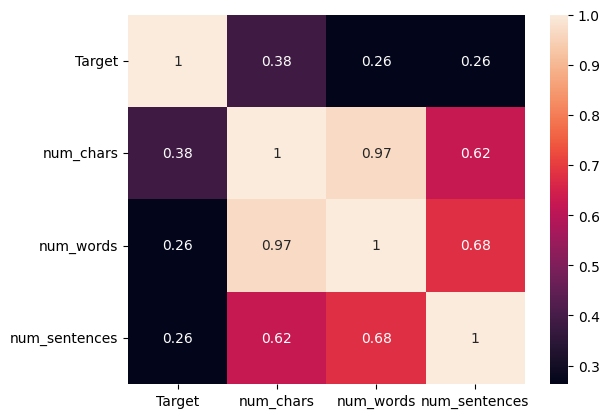

In [37]:
#checking correlation
sns.heatmap(df[['Target', 'num_chars', 'num_words', 'num_sentences']].corr(), annot=True)

In [38]:
# as there is a very strong correlation b/w last 3 cols, so we will keep only one among them

# Data Preprocessing
* lower case
* Tokenisation
* remove special chars
* remove stop words and punctuation
* stemming

In [57]:
from nltk.corpus import stopwords
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
#stemming
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()
st.stem("dancing")

'danc'

In [78]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    text2=[]
    for i in text:
        if i.isalnum():
           text2.append(i)

    text=text2.copy()
    text2.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text2.append(i)

    text=text2.copy()
    text2.clear()
    for i in text:
        text2.append(st.stem(i))
    
    return ' '.join(text2)

In [79]:
transform_text("hey, Dude!. Isn't she pretty?")

'hey dude pretti'

In [87]:
df['transform_text'] = df['SMS'].apply(transform_text)

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_21492\3975860990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text'] = df['SMS'].apply(transform_text)


In [88]:
df

,Target,SMS,num_chars,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [89]:
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [90]:
spam_wc = wc.generate(df[df['Target']==1]['transform_text'].str.cat(sep=' '))

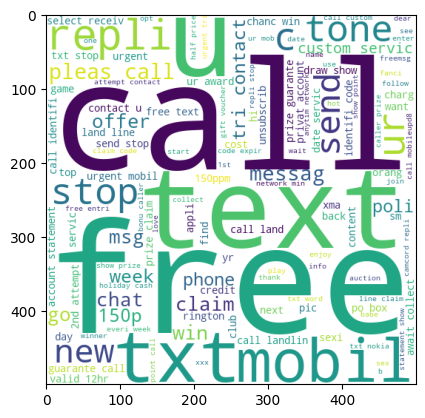

In [94]:
import matplotlib.pyplot as plt
plt.imshow(spam_wc)

In [95]:
ham_wc = wc.generate(df[df['Target']==0]['transform_text'].str.cat(sep=' '))

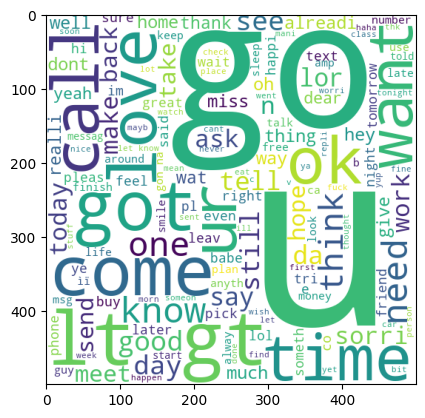

In [96]:
plt.imshow(ham_wc)

In [100]:
spam_corpus=[]
for msg in df[df['Target']==1]['transform_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [126]:
# counting freq of words in ham corpus
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [127]:
freq = pd.DataFrame(Counter(spam_corpus).most_common(30))
freq

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


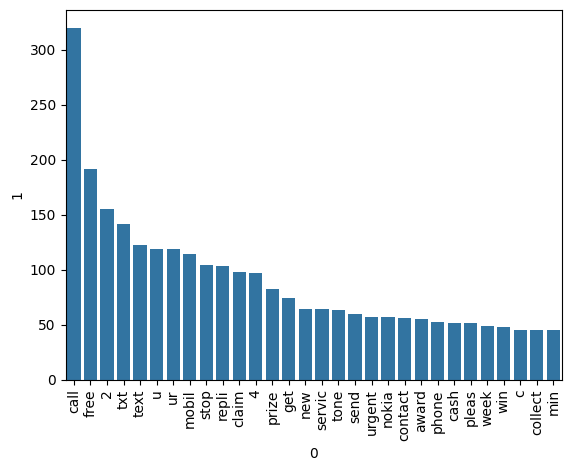

In [128]:
sns.barplot(data=freq, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [129]:
ham_corpus=[]
for msg in df[df['Target']==0]['transform_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)



In [130]:
# counting freq of words in ham corpus
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

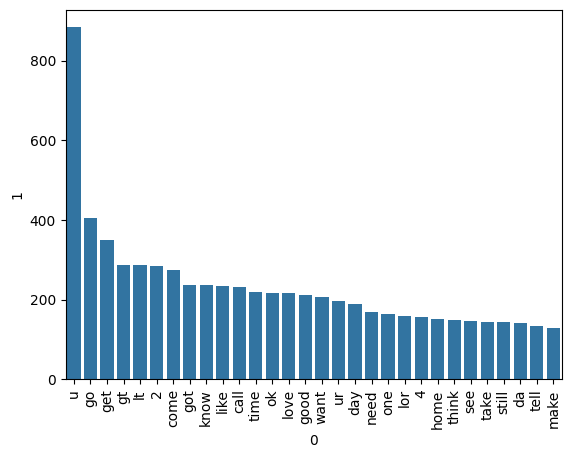

In [133]:
freq2 = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(data=freq2, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)

In [210]:
X = vectorizer.fit_transform(df['transform_text']).toarray()

In [211]:
X.shape

(5169, 3000)

In [212]:
Y=df['Target'].values

In [213]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [215]:
X_train.shape

(4135, 3000)

In [216]:
X_test.shape

(1034, 3000)

In [217]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [218]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [219]:
gb.fit(X_train, Y_train)
y_pred1 = gb.predict(X_test)
print("Accuracy score: ",accuracy_score(Y_test,y_pred1))
print("Confusion matrix: \n",confusion_matrix(Y_test,y_pred1))
print("Precision score: ",precision_score(Y_test,y_pred1))

Accuracy score:  0.8646034816247582
Confusion matrix: 
 [[773 121]
 [ 19 121]]
Precision score:  0.5


In [220]:
mb.fit(X_train, Y_train)
y_pred2 = mb.predict(X_test)
print("Accuracy score: ",accuracy_score(Y_test,y_pred2))
print("Confusion matrix: \n",confusion_matrix(Y_test,y_pred2))
print("Precision score: ",precision_score(Y_test,y_pred2))

Accuracy score:  0.9690522243713733
Confusion matrix: 
 [[894   0]
 [ 32 108]]
Precision score:  1.0


In [221]:
bb.fit(X_train, Y_train)
y_pred3 = bb.predict(X_test)
print("Accuracy score: ",accuracy_score(Y_test,y_pred3))
print("Confusion matrix: \n",confusion_matrix(Y_test,y_pred3))
print("Precision score: ",precision_score(Y_test,y_pred3))

Accuracy score:  0.9806576402321083
Confusion matrix: 
 [[893   1]
 [ 19 121]]
Precision score:  0.9918032786885246


In [222]:
# as multinomial naive bayes classifier has maximum precision, so we will choose it

# Model Improvement

In [ ]:
# In vectorizer, use max_features=3000

In [245]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [246]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [247]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc,  
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [248]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [249]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9829059829059829
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9690522243713733
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8272727272727273
For  RF
Accuracy -  0.9661508704061895
Precision -  1.0


C:\Users\HARSHIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9564796905222437
Precision -  0.9203539823008849
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.926829268292683
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9886363636363636
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9819819819819819


In [250]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.969052,1.000000
4,RF,0.966151,1.000000
7,ETC,0.974855,0.991379
8,GBDT,0.947776,0.988636
0,SVC,0.973888,0.982906
9,xgb,0.968085,0.981982
6,BgC,0.966151,0.926829
5,AdaBoost,0.956480,0.920354
3,DT,0.934236,0.827273


In [251]:
# Voting Classifier
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [252]:
voting = VotingClassifier(estimators=[('nb', mnb), ('DT',dtc), ('et', etc)],voting='soft')

In [253]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('DT', DecisionTreeClassifier(max_depth=5)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [254]:
voting.fit(X_train, Y_train)
y_pred = voting.predict(X_test)
print("Accuracy score: ",accuracy_score(Y_test,y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test,y_pred))
print("Precision score: ",precision_score(Y_test,y_pred))

Accuracy score:  0.9671179883945842
Confusion matrix: 
 [[894   0]
 [ 34 106]]
Precision score:  1.0


In [255]:
# Applying stacking
estimators=[('nb', mnb), ('DT',dtc), ('et', etc)]
final_estimator=RandomForestClassifier()

In [256]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,Y_train)

In [ ]:
y_predo = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_predo))
print("Precision",precision_score(Y_test,y_predo))

In [ ]:
import pickle
pickle.dump(vectorizer, open('vectorize.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))

# Achieved an accuracy of 98.45% and precision 100% :>

In [23]:
import pickle
clf=pickle.load(open('model.pkl', 'rb'))
vectorizer=pickle.load(open('vectorize.pkl', 'rb'))

In [25]:
# pre-processing-> vectorize-> prediction

import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


st=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    text2=[]
    for i in text:
        if i.isalnum():
           text2.append(i)

    text=text2.copy()
    text2.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text2.append(i)

    text=text2.copy()
    text2.clear()
    for i in text:
        text2.append(st.stem(i))
    
    return ' '.join(text2)
    
statement='You have won a free iPhone! Claim your prize by clicking here: http://fakeprizesite.com.'
clf.predict(vectorizer.transform([transform_text(statement)]))

array([1])